In [89]:
from pyecharts.charts import Gauge
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import pickle
import geocoder
from forecastiopy import *
import datetime
import matplotlib.pyplot as plt

In [72]:
def cata (time,skin_type,spf,cloth_type,activities):
    
    g = geocoder.ip('me')
    a = g.latlng
    fio = ForecastIO.ForecastIO('a1b7034819c4c27fdc1eb1f586cd3d96', latitude=a[0], longitude=a[1])
    current = FIOCurrently.FIOCurrently(fio)
    uv = current.uvIndex
    
    uvtime = [[uv,time]]
    
    if spf == 15:
        spf_par = 0.07
    elif spf == 30:
        spf_par = 0.03
    elif spf == 50:
        spf_par = 0.02
    elif spf == 0:
        spf_par = 1
        
        
    dose_model = pickle.load(open('dose_model.sav', 'rb'))
    logisticRegr_1 = pickle.load(open('logisticRegr_1.sav', 'rb'))    
    
    activities_dict = {'Picnic,Barbecue':1.05,'Grasslands':1.02,'Soil, clay':1.06,'Road trip':1.09,'City tour':1.22,
                    'Boat deck(wood or fibreglass)': 1.09,'Open water': 1.03,'Open ocean': 1.08,'Sea surf': 1.3,
                    'Beach sand, wet': 1.07,'Beach sand, dry': 1.18,'Snow':1.88}
    cloth_dict = {'Lycra/Elastanes':0.25,'Plastic':0.4,'Nylon':0.7,'Polyester':0.7,'Cotton':0.7,
                 'Polyester/Cotton':0.7}    
        
    poly = PolynomialFeatures(degree=2)
    uvtime_train = poly.fit_transform(uvtime)
    does = dose_model.predict(uvtime_train)*spf_par*activities_dict[activities]*cloth_dict[cloth_type]
    if does <= 0:
        does = 0
    
    dose_skin = np.array([does,skin_type])
    poly = PolynomialFeatures(degree=2)
    dose_skin = dose_skin.reshape(1,2)
    dose_skin_trans = poly.fit_transform(dose_skin)
    label = logisticRegr_1.predict(dose_skin_trans)
            
    return (label)

In [73]:
def spf_recom (time,skin_type,cloth_type,activities):
    spfli = [0,15,30,50]
    recommendedspf = 0
    for item in spfli:
        recommendedspf = item
        temp = float(cata(time,skin_type,item,cloth_type,activities))
        if temp < 2:
            break
    return(recommendedspf)

In [113]:
spf_recom(300,1,'Polyester/Cotton','Snow')

//anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LinearRegression from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


0

In [26]:
cata(10,1,50,'Polyester/Cotton','Snow')

//anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LinearRegression from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([1])

In [27]:
dose_model = pickle.load(open('dose_model.sav', 'rb'))
logisticRegr_1 = pickle.load(open('logisticRegr_1.sav', 'rb')) 

//anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LinearRegression from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [43]:
g = geocoder.ip('me')
g.latlng

[-37.814, 144.9633]

In [82]:
g = geocoder.arcgis(u"Guangzhou")
a = g.latlng
fio = ForecastIO.ForecastIO('a1b7034819c4c27fdc1eb1f586cd3d96', latitude=a[0], longitude=a[1])
current = FIOCurrently.FIOCurrently(fio)
uv = current.uvIndex

In [111]:
def cata (time,skin_type,spf,cloth_type,activities):
    
    g = geocoder.arcgis(u"Guangzhou")
    a = g.latlng
    fio = ForecastIO.ForecastIO('a1b7034819c4c27fdc1eb1f586cd3d96', latitude=a[0], longitude=a[1])
    current = FIOCurrently.FIOCurrently(fio)
    uv = current.uvIndex
    
    uvtime = [[uv,time]]
    
    if spf == 15:
        spf_par = 0.07
    elif spf == 30:
        spf_par = 0.03
    elif spf == 50:
        spf_par = 0.02
    elif spf == 0:
        spf_par = 1
        
        
    dose_model = pickle.load(open('dose_model.sav', 'rb'))
    logisticRegr_1 = pickle.load(open('logisticRegr_1.sav', 'rb'))    
    
    activities_dict = {'Picnic,Barbecue':1.05,'Grasslands':1.02,'Soil, clay':1.06,'Road trip':1.09,'City tour':1.22,
                    'Boat deck(wood or fibreglass)': 1.09,'Open water': 1.03,'Open ocean': 1.08,'Sea surf': 1.3,
                    'Beach sand, wet': 1.07,'Beach sand, dry': 1.18,'Snow':1.88}
    cloth_dict = {'Lycra/Elastanes':0.25,'Plastic':0.4,'Nylon':0.7,'Polyester':0.7,'Cotton':0.7,
                 'Polyester/Cotton':0.7}    
        
    poly = PolynomialFeatures(degree=2)
    uvtime_train = poly.fit_transform(uvtime)
    does = dose_model.predict(uvtime_train)*spf_par*activities_dict[activities]*cloth_dict[cloth_type]
    if does <= 0:
        does = 0
    
    dose_skin = np.array([does,skin_type])
    poly = PolynomialFeatures(degree=2)
    dose_skin = dose_skin.reshape(1,2)
    dose_skin_train = poly.fit_transform(dose_skin)
    label = logisticRegr_1.predict(dose_skin_train)
            
    return (label)

In [109]:
cata(10,1,50,'Polyester/Cotton','Snow')

[1]


//anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LinearRegression from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


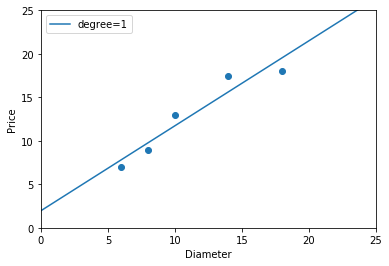

In [106]:
x_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
 
# 一次线性回归的学习与预测
# 线性回归模型 学习
regressor = LinearRegression()
regressor.fit(x_train, y_train)
# 画出一次线性回归的拟合曲线
xx = np.linspace(0, 25, 100)   # 0到25均匀采集100个点做x轴
xx = xx.reshape(xx.shape[0], 1)
yy = regressor.predict(xx)  # 计算每个点对应的y
plt.scatter(x_train, y_train)   # 画出训练数据的点
plt1, = plt.plot(xx, yy, label="degree=1")
plt.axis([0, 25, 0, 25])
plt.xlabel("Diameter")
plt.ylabel("Price")
plt.legend(handles=[plt1])
plt.show()

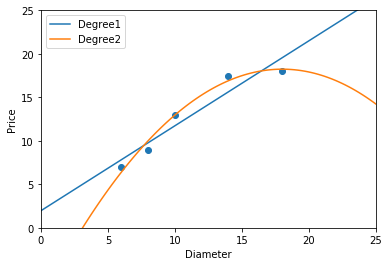

Training score: 0.9816421639597427


In [116]:
# 2次线性回归进行预测
poly2 = PolynomialFeatures(degree=2)    # 2次多项式特征生成器
x_train_poly2 = poly2.fit_transform(x_train)
# 建立模型预测
regressor_poly2 = LinearRegression()
regressor_poly2.fit(x_train_poly2, y_train)
# 画出2次线性回归的图
xx_poly2 = poly2.transform(xx)
yy_poly2 = regressor_poly2.predict(xx_poly2)
plt.scatter(x_train, y_train)
plt1, = plt.plot(xx, yy, label="Degree1")
plt2, = plt.plot(xx, yy_poly2, label="Degree2")
plt.axis([0, 25, 0, 25])
plt.xlabel("Diameter")
plt.ylabel("Price")
plt.legend(handles=[plt1, plt2])
plt.show()
# 输出二次回归模型的预测样本评分
print("Training score:", regressor_poly2.score(x_train_poly2, y_train))

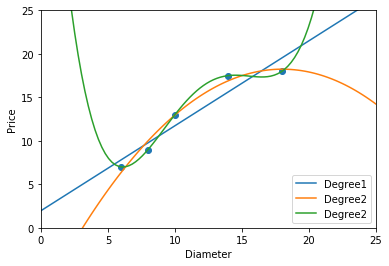

Traing score: 1.0


In [115]:
# 进行四次线性回归模型拟合
poly4 = PolynomialFeatures(degree=4)    # 4次多项式特征生成器
x_train_poly4 = poly4.fit_transform(x_train)
# 建立模型预测
regressor_poly4 = LinearRegression()
regressor_poly4.fit(x_train_poly4, y_train)
# 画出2次线性回归的图
xx_poly4 = poly4.transform(xx)
yy_poly4 = regressor_poly4.predict(xx_poly4)
plt.scatter(x_train, y_train)
plt1, = plt.plot(xx, yy, label="Degree1")
plt2, = plt.plot(xx, yy_poly2, label="Degree2")
plt4, = plt.plot(xx, yy_poly4, label="Degree2")
plt.axis([0, 25, 0, 25])
plt.xlabel("Diameter")
plt.ylabel("Price")
plt.legend(handles=[plt1, plt2, plt4])
plt.show()
# 输出二次回归模型的预测样本评分
print("Traing score:", regressor_poly4.score(x_train_poly4, y_train))  

In [117]:
# 准备测试数据
x_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
print("一次线性模型在测试集合上得分:", regressor.score(x_test, y_test))   # 0.809726797707665
x_test_poly2 = poly2.transform(x_test)
print("二次线性模型在测试集合上得分:", regressor_poly2.score(x_test_poly2, y_test))   # 0.8675443656345054
x_test_poly4 = poly4.transform(x_test)
print("四次线性模型在测试集合上得分:", regressor_poly4.score(x_test_poly4, y_test))   # 0.8095880795746723

一次线性模型在测试集合上得分: 0.809726797707665
二次线性模型在测试集合上得分: 0.8675443656345073
四次线性模型在测试集合上得分: 0.8095880795766807
